<a href="https://colab.research.google.com/github/MHusni1604/Pengantar-Anlisis-Data-Panel/blob/main/Tugas_Minggu_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Dampak Trump Tariffs Terhadap Harga Saham LQ45
---
![Trump Tariffs](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a1/Trump_showing_a_chart_with_reciprocal_tariffs_%28cropped%29.jpg/500px-Trump_showing_a_chart_with_reciprocal_tariffs_%28cropped%29.jpg)

## Pendahuluan

Pada tanggal 2 April 2025, pemerintahan Presiden Donald Trump mengumumkan kebijakan baru terkait tarif impor yang berdampak signifikan pada dinamika ekonomi global. Kebijakan yang dikenal sebagai **"Trump Tariffs"** ini menaikkan tarif rata-rata barang impor ke Amerika Serikat dari sekitar 2,5% menjadi 27% [\[1\]](https://en.wikipedia.org/wiki/Tariffs_in_the_second_Trump_administration). Kenaikan tarif tersebut memicu gejolak di pasar global, termasuk memberikan tekanan pada pasar keuangan negara berkembang seperti Indonesia.

Indeks **LQ45** merupakan indeks harga saham yang mencakup 45 saham paling likuid di Bursa Efek Indonesia (BEI) dan menjadi indikator utama dalam menilai respon pasar domestik terhadap perubahan kondisi global [\[2\]](https://id.wikipedia.org/wiki/Indeks_LQ45). Harga saham dalam indeks ini sangat dipengaruhi oleh sentimen internasional dan indikator makroekonomi domestik seperti suku bunga, inflasi, dan nilai tukar Rupiah terhadap Dolar Amerika Serikat.

Penelitian ini bertujuan untuk mengukur pengaruh kebijakan **"Trump Tariffs"** terhadap **kemungkinan kenaikan harga saham harian** perusahaan-perusahaan dalam indeks LQ45. Variabel dependen yang digunakan berupa variabel biner yang menunjukkan apakah harga saham mengalami kenaikan dibanding hari sebelumnya. Variabel independen mencakup suku bunga acuan Bank Indonesia (BI rate), tingkat inflasi, nilai tukar Rupiah terhadap Dolar AS, serta variabel dummy yang menandai periode penerapan tarif tersebut.

Dalam penelitian ini digunakan pendekatan **Generalized Estimating Equations (GEE)** sebagai metode estimasi model panel logistik. GEE dipilih karena mampu menangani struktur data longitudinal atau panel dengan korelasi intra-klaster, dalam hal ini hubungan serial antar harga saham dalam perusahaan yang sama dari waktu ke waktu. Dengan struktur korelasi autoregresif, model GEE memungkinkan identifikasi pengaruh variabel makro dan kebijakan eksternal terhadap dinamika pergerakan saham secara lebih realistis, tanpa mengasumsikan independensi penuh antar observasi dalam satu unit perusahaan [\[3\]](https://doi.org/10.24912/jmk.v4i1.17118).

## Metodologi

### Sumber Data  
Penelitian ini menggunakan pendekatan kuantitatif dengan metode regresi data panel untuk menganalisis pengaruh kebijakan tarif impor Amerika Serikat tahun 2025 (**Tarif Trump 2025**) terhadap **kemungkinan kenaikan harga saham harian** perusahaan yang tergabung dalam Indeks LQ45 di Bursa Efek Indonesia.  
Data yang digunakan merupakan data sekunder yang diperoleh dari dua sumber utama, yaitu [Yahoo Finance](https://finance.yahoo.com) untuk data harga penutupan saham harian dan nilai tukar Rupiah terhadap Dolar AS, serta [situs resmi Bank Indonesia](https://www.bi.go.id) untuk data suku bunga acuan (BI Rate) dan tingkat inflasi.

### Spesifikasi Model  
Untuk menangkap struktur data panel longitudinal dan adanya korelasi antar observasi dalam unit perusahaan yang sama dari waktu ke waktu, digunakan metode **Generalized Estimating Equations (GEE)** dengan distribusi **binomial** dan fungsi taut **logit**. Variabel dependen berupa variabel biner (`Target`) yang bernilai 1 jika harga saham hari ini lebih tinggi dari harga hari sebelumnya, dan 0 jika tidak.

Model regresi yang digunakan secara umum dapat dituliskan sebagai:

$$
\text{logit}(P(Y_{it} = 1)) = \alpha + \beta_1 (\text{BI-Rate})_{t} + \beta_2 (\text{Rate Inflasi})_{t} + \beta_3 (\text{USD/IDR})_{t} + \beta_4 (\text{Trump Tariffs})_{t}
$$

Keterangan:  
- $Y_{it}$: Variabel biner, 1 jika harga saham perusahaan $i$ pada waktu $t$ naik dari hari sebelumnya  
- $\alpha$: Intersep model  
- $\beta_1, ..., \beta_4$: Koefisien regresi  
- $(\text{Trump Tariffs})_{t}$: Dummy bernilai 1 selama periode kebijakan tarif Trump 2025 berlangsung  
- Struktur korelasi antar waktu di dalam perusahaan dimodelkan menggunakan **Autoregressive (AR-1)**

### Alasan Pemilihan Metode  
Metode GEE dipilih karena mampu menangani korelasi internal antar pengamatan berulang (longitudinal) dalam satu klaster (dalam hal ini, perusahaan). Dengan struktur korelasi **autoregresif**, GEE dapat memperhitungkan ketergantungan waktu secara eksplisit tanpa memerlukan spesifikasi distribusi penuh dari error.

Estimasi dilakukan dengan 45 klaster (satu klaster per perusahaan) dan asumsi bahwa hubungan antar waktu bersifat autoregresif. Model ini memberikan estimasi parameter populasi yang konsisten meskipun struktur korelasi tidak sepenuhnya tepat, sehingga sesuai untuk tujuan inferensial umum terhadap pengaruh kebijakan dan variabel makroekonomi terhadap pergerakan harga saham.

Dengan pendekatan ini, diharapkan hasil analisis dapat memberikan gambaran yang lebih akurat mengenai dampak **kebijakan tarif Trump 2025** dan **kondisi makroekonomi** terhadap **kemungkinan kenaikan harga saham harian** di pasar modal Indonesia.


# Hasil dan Pembahasan

## Import Library

In [ ]:
pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.5 MB/s eta 0:00:00


In [ ]:
# === Library Umum ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Pengambilan Data Finansial ===
import yfinance as yf

# === Statistik dan Ekonometrika ===
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson

# === Model Panel Data ===
from linearmodels.panel import PanelOLS

# === Generalized Estimating Equations (GEE) ===
from statsmodels.genmod.generalized_estimating_equations import GEE
from statsmodels.genmod.cov_struct import Exchangeable, Autoregressive

# === Evaluasi Model ===
from sklearn.metrics import roc_auc_score, roc_curve


## Data Loading

Mengambil data saham LQ45 dari laman Yahoo Finance

In [ ]:
tickers = [
    "ACES.JK", "ADMR.JK", "ADRO.JK", "AKRA.JK", "AMMN.JK", "AMRT.JK", "ANTM.JK", "ARTO.JK",
    "ASII.JK", "BBCA.JK", "BBNI.JK", "BBRI.JK", "BBTN.JK", "BMRI.JK", "BRIS.JK", "BRPT.JK",
    "CPIN.JK", "CTRA.JK", "ESSA.JK", "EXCL.JK", "GOTO.JK", "ICBP.JK", "INCO.JK", "INDF.JK",
    "INKP.JK", "ISAT.JK", "ITMG.JK", "JPFA.JK", "JSMR.JK", "KLBF.JK", "MAPA.JK", "MAPI.JK",
    "MBMA.JK", "MDKA.JK", "MEDC.JK", "PGAS.JK", "PGEO.JK", "PTBA.JK", "SIDO.JK", "SMGR.JK",
    "SMRA.JK", "TLKM.JK", "TOWR.JK", "UNTR.JK", "UNVR.JK"
]

data = yf.download(tickers, start="2025-01-01", end="2025-05-31")['Close']

data_panel = data.stack().reset_index()
data_panel.columns = ['Date', 'Ticker', 'Close']

df_saham = data_panel.copy()
df_saham['Date'] = pd.to_datetime(df_saham['Date'])

df_saham

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  45 of 45 completed


,Date,Ticker,Close
0,2025-01-02,ACES.JK,755.000000
1,2025-01-02,ADMR.JK,1165.000000
2,2025-01-02,ADRO.JK,2530.000000
3,2025-01-02,AKRA.JK,1110.232544
4,2025-01-02,AMMN.JK,8475.000000
...,...,...,...
4090,2025-05-28,SMRA.JK,404.000000
4091,2025-05-28,TLKM.JK,2820.000000
4092,2025-05-28,TOWR.JK,585.000000
4093,2025-05-28,UNTR.JK,22450.000000


Mengambil data BI-rate dari laman resmi BI

In [ ]:
df_birate = {
    'Date' : ['2024-12-18', '2025-01-15', '2025-02-19', '2025-03-19', '2025-04-23', '2025-05-21'],
    'BI-Rate' : [0.0600, 0.0575, 0.0575, 0.0575, 0.0575, 0.0550]
}

df_birate = pd.DataFrame(df_birate)
df_birate['Date'] = pd.to_datetime(df_birate['Date'])
df_birate['Start Date'] = df_birate['Date']
df_birate['End Date'] = df_birate['Date'].shift(-1)

last_end_date = df_saham['Date'].max()
df_birate.loc[df_birate.index[-1], 'End Date'] = last_end_date

df_birate

,Date,BI-Rate,Start Date,End Date
0,2024-12-18,0.0600,2024-12-18,2025-01-15
1,2025-01-15,0.0575,2025-01-15,2025-02-19
2,2025-02-19,0.0575,2025-02-19,2025-03-19
3,2025-03-19,0.0575,2025-03-19,2025-04-23
4,2025-04-23,0.0575,2025-04-23,2025-05-21
5,2025-05-21,0.0550,2025-05-21,2025-05-28


In [ ]:
wide_df = df_saham.reset_index().pivot(index='Date', columns='Ticker', values='Close').reset_index()

def assign_value(date):
    for i in range(len(df_birate)):
        if df_birate.loc[i, 'Start Date'] <= date <= df_birate.loc[i, 'End Date']:
            return df_birate.loc[i, 'BI-Rate']
    return None

wide_df['BI-Rate'] = wide_df['Date'].apply(assign_value)
df_saham = wide_df.melt(id_vars=['Date', 'BI-Rate'], var_name='Ticker', value_name='Close')

df_saham

,Date,BI-Rate,Ticker,Close
0,2025-01-02,0.060,ACES.JK,755.0
1,2025-01-03,0.060,ACES.JK,755.0
2,2025-01-06,0.060,ACES.JK,755.0
3,2025-01-07,0.060,ACES.JK,735.0
4,2025-01-08,0.060,ACES.JK,705.0
...,...,...,...,...
4090,2025-05-22,0.055,UNVR.JK,1815.0
4091,2025-05-23,0.055,UNVR.JK,1785.0
4092,2025-05-26,0.055,UNVR.JK,1765.0
4093,2025-05-27,0.055,UNVR.JK,1740.0


Mengambil data tingkat inflasi dari laman resmi BI

In [ ]:
df_inflasi = {
    'Date' : ['2025-01-01', '2025-02-01', '2025-03-01', '2025-04-01', '2025-05-01'],
    'Rate Inflasi' : [0.0160, 0.0195, 0.0103, -0.0009, 0.0076]
}

df_inflasi = pd.DataFrame(df_inflasi)
df_inflasi['Date'] = pd.to_datetime(df_inflasi['Date'])

df_inflasi

,Date,Rate Inflasi
0,2025-01-01,0.0160
1,2025-02-01,0.0195
2,2025-03-01,0.0103
3,2025-04-01,-0.0009
4,2025-05-01,0.0076


In [ ]:
df_saham['Month'] = df_saham['Date'].dt.month
df_inflasi['Month'] = df_inflasi['Date'].dt.month
df_saham = df_saham.merge(df_inflasi[['Month', 'Rate Inflasi']], on='Month', how='left')
df_saham.drop(columns=['Month'], inplace=True)

Mengambil data rate nilai tukar dollar dari laman Yahoo Finance

In [ ]:
kurs = yf.download(
    "USDIDR=X",
    start=wide_df['Date'].min().strftime('%Y-%m-%d'),
    end=(wide_df['Date'].max() + pd.Timedelta(days=1)).strftime('%Y-%m-%d')
)

df_kurs = kurs[['Close']].reset_index()
df_kurs.columns = ['Date', 'USD_IDR']

df_kurs

[*********************100%***********************]  1 of 1 completed


,Date,USD_IDR
0,2025-01-02,16230.500000
1,2025-01-03,16201.099609
2,2025-01-06,16178.799805
3,2025-01-07,16179.099609
4,2025-01-08,16157.700195
...,...,...
98,2025-05-22,16347.599609
99,2025-05-23,16356.900391
100,2025-05-26,16211.000000
101,2025-05-27,16243.500000


In [ ]:
df_saham = df_saham.merge(df_kurs, left_on='Date', right_on='Date', how='left')
df_saham

,Date,BI-Rate,Ticker,Close,Rate Inflasi,USD_IDR
0,2025-01-02,0.060,ACES.JK,755.0,0.0160,16230.500000
1,2025-01-03,0.060,ACES.JK,755.0,0.0160,16201.099609
2,2025-01-06,0.060,ACES.JK,755.0,0.0160,16178.799805
3,2025-01-07,0.060,ACES.JK,735.0,0.0160,16179.099609
4,2025-01-08,0.060,ACES.JK,705.0,0.0160,16157.700195
...,...,...,...,...,...,...
4090,2025-05-22,0.055,UNVR.JK,1815.0,0.0076,16347.599609
4091,2025-05-23,0.055,UNVR.JK,1785.0,0.0076,16356.900391
4092,2025-05-26,0.055,UNVR.JK,1765.0,0.0076,16211.000000
4093,2025-05-27,0.055,UNVR.JK,1740.0,0.0076,16243.500000


In [ ]:
df_saham['Trump Tariffs'] = (df_saham.Date >= pd.to_datetime('2025-04-05')).astype(int)
df_saham

,Date,BI-Rate,Ticker,Close,Rate Inflasi,USD_IDR,Trump Tariffs
0,2025-01-02,0.060,ACES.JK,755.0,0.0160,16230.500000,0
1,2025-01-03,0.060,ACES.JK,755.0,0.0160,16201.099609,0
2,2025-01-06,0.060,ACES.JK,755.0,0.0160,16178.799805,0
3,2025-01-07,0.060,ACES.JK,735.0,0.0160,16179.099609,0
4,2025-01-08,0.060,ACES.JK,705.0,0.0160,16157.700195,0
...,...,...,...,...,...,...,...
4090,2025-05-22,0.055,UNVR.JK,1815.0,0.0076,16347.599609,1
4091,2025-05-23,0.055,UNVR.JK,1785.0,0.0076,16356.900391,1
4092,2025-05-26,0.055,UNVR.JK,1765.0,0.0076,16211.000000,1
4093,2025-05-27,0.055,UNVR.JK,1740.0,0.0076,16243.500000,1


In [ ]:
df_saham.sort_values(by=['Ticker', 'Date'], inplace=True)
df_saham.set_index(['Ticker', 'Date'], inplace=True)
df_saham

BI-Rate   Close  Rate Inflasi       USD_IDR  Trump Tariffs
Ticker  Date                                                                  
ACES.JK 2025-01-02    0.060   755.0        0.0160  16230.500000              0
        2025-01-03    0.060   755.0        0.0160  16201.099609              0
        2025-01-06    0.060   755.0        0.0160  16178.799805              0
        2025-01-07    0.060   735.0        0.0160  16179.099609              0
        2025-01-08    0.060   705.0        0.0160  16157.700195              0
...                     ...     ...           ...           ...            ...
UNVR.JK 2025-05-22    0.055  1815.0        0.0076  16347.599609              1
        2025-05-23    0.055  1785.0        0.0076  16356.900391              1
        2025-05-26    0.055  1765.0        0.0076  16211.000000              1
        2025-05-27    0.055  1740.0        0.0076  16243.500000              1
        2025-05-28    0.055  1730.0        0.0076  16279.000000              1

[4095 rows x 5 columns]

## Model Development

Data Lengkap setelah disatukan

In [ ]:
df_saham.dropna(inplace=True)
df_saham['Target'] = df_saham.groupby(level=0)['Close'].diff().gt(0).astype(int)
df_saham

BI-Rate   Close  Rate Inflasi       USD_IDR  \
Ticker  Date                                                      
ACES.JK 2025-01-02    0.060   755.0        0.0160  16230.500000   
        2025-01-03    0.060   755.0        0.0160  16201.099609   
        2025-01-06    0.060   755.0        0.0160  16178.799805   
        2025-01-07    0.060   735.0        0.0160  16179.099609   
        2025-01-08    0.060   705.0        0.0160  16157.700195   
...                     ...     ...           ...           ...   
UNVR.JK 2025-05-22    0.055  1815.0        0.0076  16347.599609   
        2025-05-23    0.055  1785.0        0.0076  16356.900391   
        2025-05-26    0.055  1765.0        0.0076  16211.000000   
        2025-05-27    0.055  1740.0        0.0076  16243.500000   
        2025-05-28    0.055  1730.0        0.0076  16279.000000   

                    Trump Tariffs  Target  
Ticker  Date                               
ACES.JK 2025-01-02              0       0  
        2025-01-03              0       0  
        2025-01-06              0       0  
        2025-01-07              0       0  
        2025-01-08              0       0  
...                           ...     ...  
UNVR.JK 2025-05-22              1       1  
        2025-05-23              1       0  
        2025-05-26              1       0  
        2025-05-27              1       0  
        2025-05-28              1       0  

[4050 rows x 6 columns]

Ringakasan dari data yang digunakan

In [ ]:
df_saham.describe()

,BI-Rate,Close,Rate Inflasi,USD_IDR,Trump Tariffs,Target
count,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000,4050.000000
mean,0.057639,3494.110791,0.011171,16430.656630,0.355556,0.439259
std,0.001011,4818.931660,0.006871,208.341001,0.478740,0.496358
min,0.055000,64.000000,-0.000900,16157.700195,0.000000,0.000000
25%,0.057500,945.209259,0.007600,16279.000000,0.000000,0.000000
50%,0.057500,1895.000000,0.010300,16352.250000,0.000000,0.000000
75%,0.057500,4000.000000,0.016000,16538.300781,1.000000,1.000000
max,0.060000,26423.287109,0.019500,17051.900391,1.000000,1.000000


Cek multikolinearitas dari variabel


In [ ]:
X = df_saham.drop(columns=['Close', 'Target'])
X = add_constant(X)

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.drop(index=0)

,Variable,VIF
1,BI-Rate,1.196004
2,Rate Inflasi,5.335810
3,USD_IDR,3.175236
4,Trump Tariffs,3.328826


Untuk memastikan tidak terjadi multikolinearitas antar variabel independen, dilakukan perhitungan Variance Inflation Factor (VIF). Hasil menunjukkan bahwa seluruh variabel memiliki nilai VIF di bawah ambang batas umum 10, yang menandakan tidak adanya masalah multikolinearitas serius. Nilai VIF tertinggi terdapat pada variabel `Rate Inflasi` ($5,33$), yang mengindikasikan adanya korelasi sedang dengan variabel lain, namun masih dalam batas toleransi. Sementara itu, variabel lainnya seperti `BI-Rate` ($1,19$), `USD_IDR` ($3,17$), dan `Trump Tariffs` ($3,32$) menunjukkan tidak adanya indikasi multikolinearitas. Dengan demikian, seluruh variabel dapat digunakan dalam pemodelan regresi panel dinamis tanpa perlu dilakukan transformasi atau penghapusan.

In [ ]:
df_saham_reset = df_saham.reset_index()

X = sm.add_constant(df_saham_reset[['BI-Rate', 'Rate Inflasi', 'USD_IDR', 'Trump Tariffs']])
y = df_saham_reset['Target']
groups = df_saham_reset['Ticker']

ind = Autoregressive()

model = GEE(y, X, groups=groups, family=sm.families.Binomial(), cov_struct=ind)
result = model.fit()
print(result.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/cov_struct.py:796: FutureWarning: grid=True will become default in a future version
  warnings.warn(


                               GEE Regression Results                              
Dep. Variable:                      Target   No. Observations:                 4050
Model:                                 GEE   No. clusters:                       45
Method:                        Generalized   Min. cluster size:                  90
                      Estimating Equations   Max. cluster size:                  90
Family:                           Binomial   Mean cluster size:                90.0
Dependence structure:       Autoregressive   Num. iterations:                     2
Date:                     Fri, 06 Jun 2025   Scale:                           1.000
Covariance type:                    robust   Time:                         13:19:29
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -15.0729      4.575     -3.295      0.001     -24.040      -6.10

Hasil regresi menggunakan metode Generalized Estimating Equations (GEE) menunjukkan bahwa dari empat variabel independen yang dianalisis, hanya `nilai tukar USD/IDR` yang memiliki pengaruh signifikan secara statistik terhadap kemungkinan kenaikan harga saham harian pada indeks LQ45 ($p < 0,001$). Koefisien positif sebesar $0,0008$ mengindikasikan bahwa setiap kenaikan nilai tukar USD terhadap Rupiah sedikit meningkatkan probabilitas kenaikan harga saham, meskipun besarnya pengaruh relatif kecil.

Variabel `Trump Tariffs` memiliki koefisien positif sebesar $0,1752$ dan mendekati signifikan pada tingkat $10\%$ ($p = 0,067$). Ini menunjukkan bahwa terdapat kecenderungan bahwa pemberlakuan tarif impor oleh pemerintah AS berkaitan dengan peningkatan peluang harga saham naik, namun secara statistik belum cukup kuat untuk disimpulkan sebagai signifikan.

Sementara itu, variabel makroekonomi lainnya yaitu `BI Rate` dan `tingkat inflasi` tidak menunjukkan pengaruh yang signifikan terhadap peluang kenaikan harga saham, dengan nilai $p$ masing-masing sebesar $0,499$ dan $0,108$. Intersep model yang bernilai negatif dan signifikan ($−15,0086$; $p = 0,001$) mengindikasikan bahwa secara umum probabilitas kenaikan harga saham cenderung rendah ketika semua variabel independen berada pada nilai nol.

In [ ]:
y = df_saham['Target']
mean_y = y.mean()
var_y = y.var()
expected_var = mean_y * (1 - mean_y)

print(f"Mean Target: {mean_y:.4f}")
print(f"Var Target : {var_y:.4f}")
print(f"Expected Var (Binomial): {expected_var:.4f}")

Mean Target: 0.4393
Var Target : 0.2464
Expected Var (Binomial): 0.2463


Hasil pemeriksaan overdispersion menunjukkan bahwa nilai rata-rata target sebesar $0,4393$ menghasilkan varians aktual sebesar $0,2464$, yang hampir identik dengan varians teoritis distribusi binomial sebesar $0,2463$. Perbedaan yang sangat kecil ini mengindikasikan tidak adanya overdispersion yang signifikan dalam model, sehingga penggunaan Generalized Estimating Equation (GEE) dengan keluarga binomial sudah sesuai secara statistik.

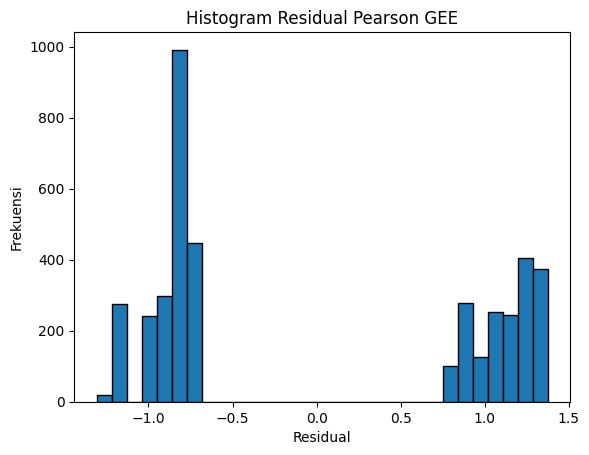

In [ ]:
residuals = result.resid_pearson

plt.hist(residuals, bins=30, edgecolor='black')
plt.title("Histogram Residual Pearson GEE")
plt.xlabel("Residual")
plt.ylabel("Frekuensi")
plt.show()

Histogram residual Pearson dari model GEE menunjukkan distribusi bimodal, dengan dua puncak utama di sekitar $-1$ dan $+1$. Pola ini mencerminkan karakteristik umum dari residual pada model dengan variabel dependen biner, di mana nilai residual terbentuk dari selisih antara nilai aktual ($0$ atau $1$) dan probabilitas prediksi. Distribusi semacam ini tidak menandakan pelanggaran asumsi model, melainkan merupakan konsekuensi alami dari penggunaan keluarga binomial dalam GEE.


AUC: 0.5896


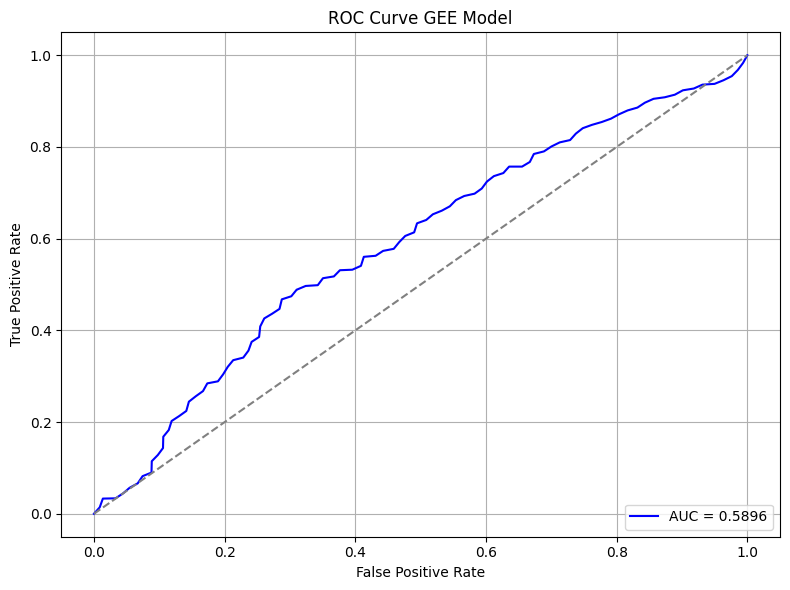

In [ ]:
pred_probs = result.predict(X)

auc = roc_auc_score(y, pred_probs)
print(f"AUC: {auc:.4f}")

fpr, tpr, thresholds = roc_curve(y, pred_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve GEE Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

Nilai AUC sebesar $0,5896$ menunjukkan bahwa model hanya sedikit lebih baik daripada tebakan acak dalam membedakan kelas positif dan negatif. Meskipun ada kemampuan pemisahan, performa model tergolong rendah dan kurang memuaskan. Dengan kata lain, model ini masih perlu diperbaiki untuk meningkatkan akurasi dan kemampuan klasifikasinya.


# Kesimpulan

Berdasarkan hasil analisis model GEE, variabel **nilai tukar USD/IDR** terbukti memiliki pengaruh signifikan terhadap kemungkinan kenaikan harga saham harian pada indeks LQ45 ($p < 0{,}001$), meskipun koefisiennya relatif kecil. Kebijakan **Trump Tariffs** menunjukkan arah pengaruh positif (koefisien = 0,1752) dan mendekati signifikansi pada tingkat 10% ($p = 0{,}067$), namun belum cukup kuat untuk ditarik kesimpulan definitif. Variabel **BI Rate** dan **tingkat inflasi** tidak berpengaruh signifikan, yang mengindikasikan bahwa fluktuasi suku bunga acuan dan inflasi selama periode studi tidak secara langsung memengaruhi probabilitas kenaikan harga saham harian.

Pemeriksaan multikolinearitas (VIF) menunjukkan bahwa semua variabel independen berada di bawah ambang batas VIF < 10, sehingga tidak terdapat masalah serius dalam korelasi antar variabel. Pengujian overdispersion juga mengonfirmasi kesesuaian penggunaan keluarga binomial pada GEE, karena varians aktual target ($0,2464$) hampir identik dengan varians teoritis binomial ($0,2463$). Analisis residual Pearson memperlihatkan distribusi bimodal khas model biner, yang merupakan implikasi alami dari struktur data dan bukan pelanggaran asumsi.

Namun, nilai **AUC** sebesar **0,5896** menunjukkan bahwa kemampuan model dalam membedakan kelas naik/tidak naik masih rendah dan hanya sedikit lebih baik daripada tebakan acak. Hal ini menandakan bahwa meski terdapat beberapa sinyal pengaruh variabel makro dan kebijakan eksternal, model masih perlu penyempurnaan untuk meningkatkan performa klasifikasi. Rekomendasi perbaikan meliputi penambahan variabel makroekonomi lain, penggunaan jangka waktu pengamatan lebih panjang, atau penerapan pendekatan model alternatif untuk memperkuat inferensi.

Secara keseluruhan, penelitian ini menggarisbawahi pentingnya **nilai tukar USD/IDR** sebagai faktor utama yang memengaruhi dinamika harga saham harian LQ45 pada periode tarif impor AS 2025, serta memberikan indikasi awal mengenai potensi dampak kebijakan **Trump Tariffs** yang perlu ditelusuri lebih lanjut.


# Sumber

[[1](https://en.wikipedia.org/wiki/Tariffs_in_the_second_Trump_administration)] "Tariffs in the second Trump administration", Wikipedia, [Online]. Tersedia: https://en.wikipedia.org/wiki/Tariffs_in_the_second_Trump_administration. [Diakses: Jun. 5, 2025]. \
[[2](https://id.wikipedia.org/wiki/Indeks_LQ45)] "Indeks LQ45", Wikipedia, [Online]. Tersedia: https://id.wikipedia.org/wiki/Indeks_LQ45. [Diakses: Jun. 5, 2025]. \
[[3](https://doi.org/10.24912/jmk.v4i1.17118)] A. B. Wijaya dan N. M. Nuryasman, "Pengaruh Variabel Makroekonomi dan Rasio Keuangan terhadap Harga Saham," Jurnal Manajerial dan Kewirausahaan, vol. 4, no. 1, pp. 12–21, Jan. 2022, doi: 10.24912/jmk.v4i1.17118. \
[4] E. W. Frees, Longitudinal and Panel Data: Analysis and Applications in the Social Sciences. Cambridge: Cambridge University Press, 2004.